In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statistics as stat
import math
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn import linear_model
from scipy.stats import t
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Trial 1 Starts

In [117]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/CSV/Table for Paper Helicopter.csv',sep = ',', na_values = ".")
df

,Unnamed: 0,Name,a,b,c,ab,ac,bc,abc,Times
0,0,I,-1,-1,-1,1,1,1,-1,1.5425
1,1,a,1,-1,-1,-1,-1,1,1,2.2425
2,2,ab,1,1,-1,1,-1,-1,-1,2.0450
3,3,b,-1,1,-1,-1,1,-1,1,1.6950
4,4,ac,1,-1,1,-1,1,-1,-1,2.1425
5,5,bc,-1,1,1,-1,-1,1,-1,1.4225
6,6,c,-1,-1,1,1,-1,-1,1,1.3500
7,7,abc,1,1,1,1,1,1,1,1.5575
8,8,I,-1,-1,-1,1,1,1,-1,1.4850
9,9,a,1,-1,-1,-1,-1,1,1,2.1050


In [118]:
a = df[['a']].to_numpy()
b = df[['b']].to_numpy()
c = df[['c']].to_numpy()
ab = df[['ab']].to_numpy()
ac = df[['ac']].to_numpy()
bc = df[['bc']].to_numpy()
abc = df[['abc']].to_numpy()

In [119]:
df.info

<bound method DataFrame.info of     Unnamed: 0 Name  a  b  c  ab  ac  bc  abc   Times
0            0    I -1 -1 -1   1   1   1   -1  1.5425
1            1    a  1 -1 -1  -1  -1   1    1  2.2425
2            2   ab  1  1 -1   1  -1  -1   -1  2.0450
3            3    b -1  1 -1  -1   1  -1    1  1.6950
4            4   ac  1 -1  1  -1   1  -1   -1  2.1425
5            5   bc -1  1  1  -1  -1   1   -1  1.4225
6            6    c -1 -1  1   1  -1  -1    1  1.3500
7            7  abc  1  1  1   1   1   1    1  1.5575
8            8    I -1 -1 -1   1   1   1   -1  1.4850
9            9    a  1 -1 -1  -1  -1   1    1  2.1050
10          10   ab  1  1 -1   1  -1  -1   -1  1.8800
11          11    b -1  1 -1  -1   1  -1    1  1.6100
12          12   ac  1 -1  1  -1   1  -1   -1  2.0550
13          13   bc -1  1  1  -1  -1   1   -1  1.4000
14          14    c -1 -1  1   1  -1  -1    1  1.2250
15          15  abc  1  1  1   1   1   1    1  1.4600
16          16    I -1 -1 -1   1   1   1   -1  1.4

In [120]:
X = df[['a','b','c','ab','ac','bc','abc']]
X = sm.add_constant(X)
X

,const,a,b,c,ab,ac,bc,abc
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,1,1,-1,1,-1,-1,-1
3,1.0,-1,1,-1,-1,1,-1,1
4,1.0,1,-1,1,-1,1,-1,-1
5,1.0,-1,1,1,-1,-1,1,-1
6,1.0,-1,-1,1,1,-1,-1,1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1


In [121]:
Y = df[['Times']]
Y

,Times
0,1.5425
1,2.2425
2,2.0450
3,1.6950
4,2.1425
5,1.4225
6,1.3500
7,1.5575
8,1.4850
9,2.1050


In [122]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Times   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     35.91
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.27e-08
Time:                        02:34:45   Log-Likelihood:                 28.299
No. Observations:                  24   AIC:                            -40.60
Df Residuals:                      16   BIC:                            -31.17
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6643      0.019     89.455      0.0

In [123]:
residual = res.resid
residual

0     0.047500
1     0.126667
2     0.159167
3     0.065000
4     0.097533
5     0.020833
6     0.095000
7     0.071667
8    -0.010000
9    -0.010833
10   -0.005833
11   -0.020000
12    0.010033
13   -0.001667
14   -0.030000
15   -0.025833
16   -0.037500
17   -0.115833
18   -0.153333
19   -0.045000
20   -0.107567
21   -0.019167
22   -0.065000
23   -0.045833
dtype: float64

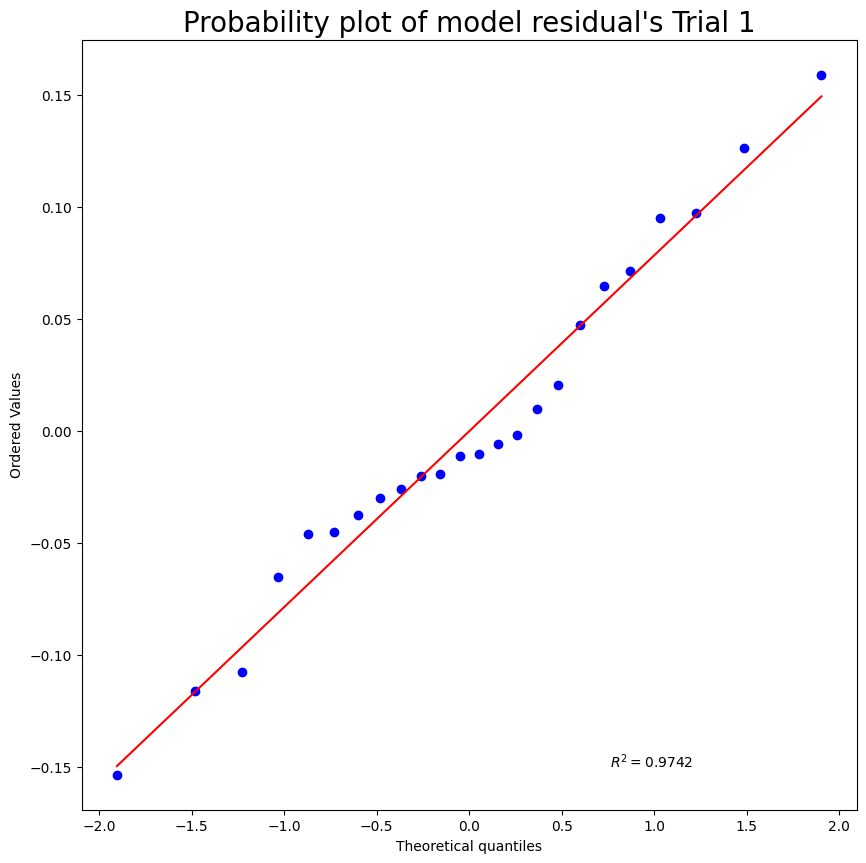

In [124]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's Trial 1", fontsize= 20)
ax.set
plt.show()

In [125]:
stats.levene(df['Times'][df['a'] == -1], df['Times'][df['a'] == 1])

LeveneResult(statistic=2.892156812036952, pvalue=0.10310644570626475)

In [126]:
stats.levene(df['Times'][df['b'] == -1], df['Times'][df['b'] == 1])

LeveneResult(statistic=14.51667922031025, pvalue=0.0009573860943689454)

In [127]:
stats.levene(df['Times'][df['c'] == -1], df['Times'][df['c'] == 1])

LeveneResult(statistic=5.5350476225612415e-05, pvalue=0.9941310138506259)

In [128]:
stats.levene(df['Times'][df['ab'] == -1], df['Times'][df['ab'] == 1])

LeveneResult(statistic=2.918358279167691, pvalue=0.10165021646548461)

In [129]:
stats.levene(df['Times'][df['ac'] == -1], df['Times'][df['ac'] == 1])

LeveneResult(statistic=5.013712993055527, pvalue=0.035583756219157756)

In [130]:
stats.levene(df['Times'][df['bc'] == -1], df['Times'][df['bc'] == 1])

LeveneResult(statistic=0.4599558396748987, pvalue=0.5047161805821028)

In [131]:
stats.levene(df['Times'][df['abc'] == -1], df['Times'][df['abc'] == 1])

LeveneResult(statistic=0.009915528077620842, pvalue=0.9215821730956547)

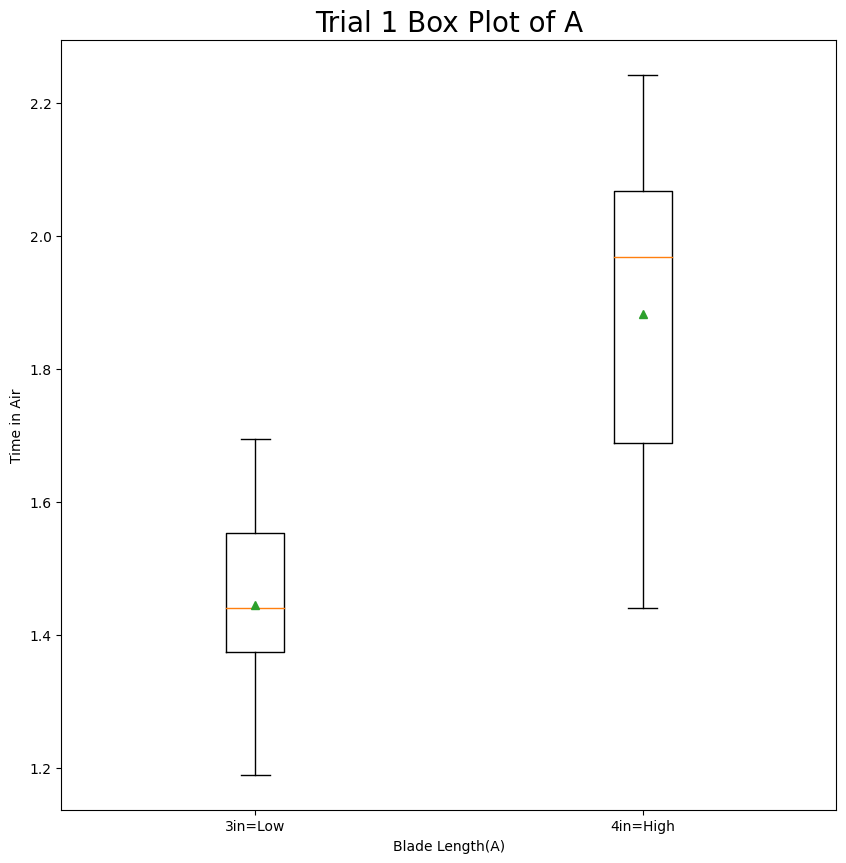

In [132]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Trial 1 Box Plot of A", fontsize= 20)
ax.set
dataa = [df['Times'][df['a'] == -1], df['Times'][df['a'] == +1]]
ax.boxplot(dataa, labels= ['3in=Low', '4in=High'], showmeans= True)
plt.xlabel("Blade Length(A)")
plt.ylabel("Time in Air")
plt.show()

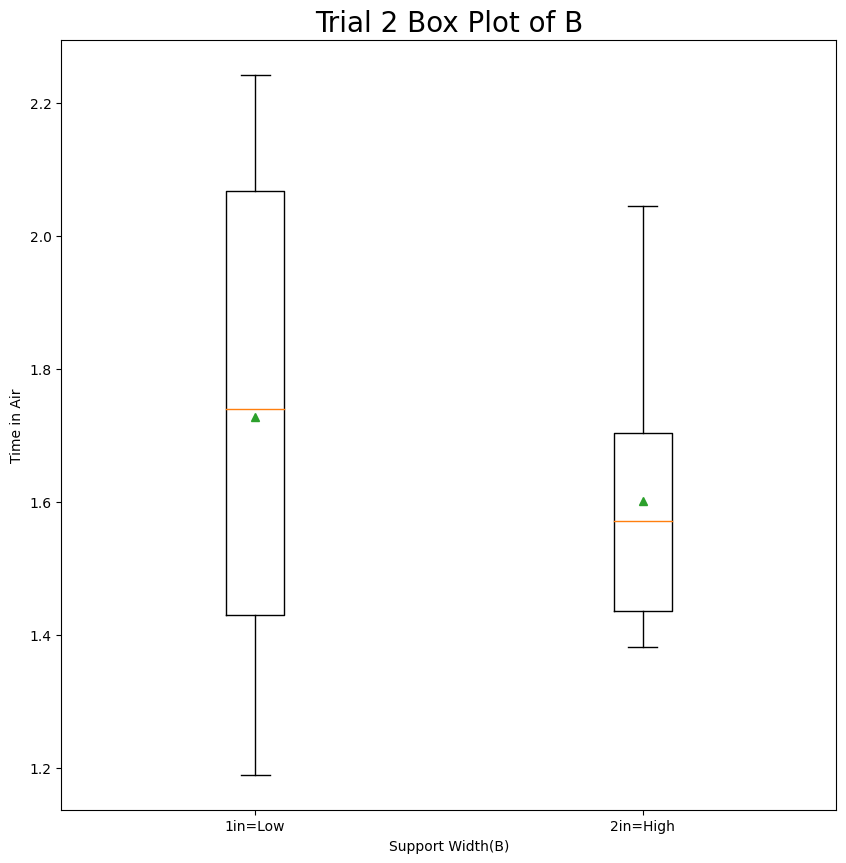

In [133]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Trial 2 Box Plot of B", fontsize= 20)
ax.set
dataa = [df['Times'][df['b'] == -1], df['Times'][df['b'] == +1]]
ax.boxplot(dataa, labels= ['1in=Low', '2in=High'], showmeans= True)
plt.xlabel("Support Width(B)")
plt.ylabel("Time in Air")
plt.show()

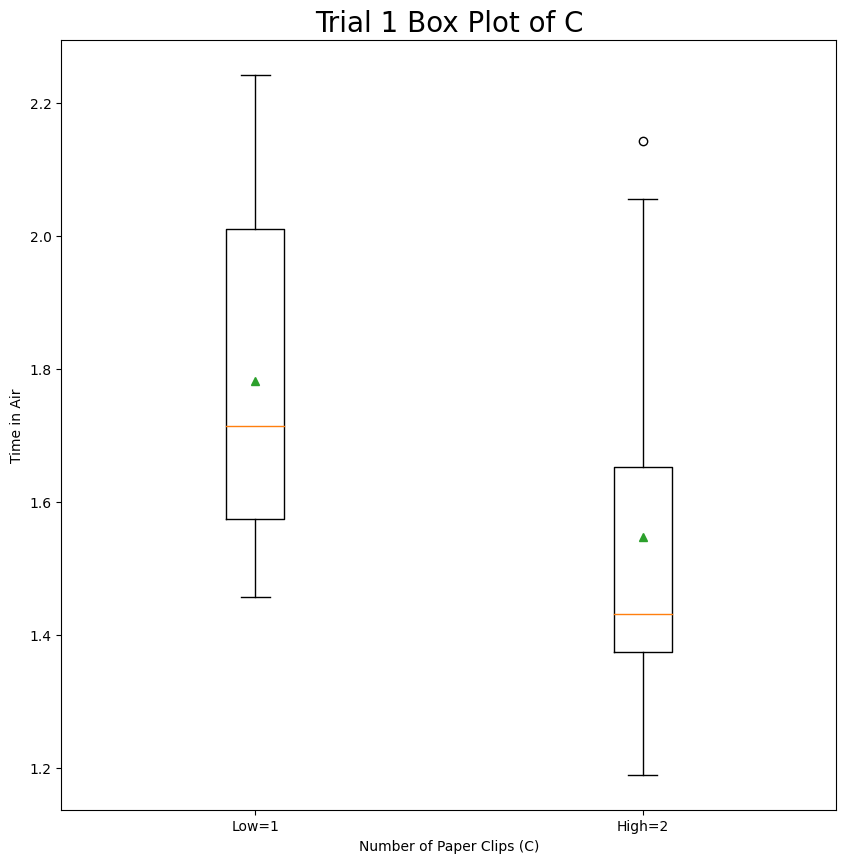

In [134]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Trial 1 Box Plot of C", fontsize= 20)
ax.set
dataa = [df['Times'][df['c'] == -1], df['Times'][df['c'] == +1]]
ax.boxplot(dataa, labels= ['Low=1', 'High=2'], showmeans= True)
plt.xlabel("Number of Paper Clips (C)")
plt.ylabel("Time in Air")
plt.show()

In [135]:
formula = 'Times ~ a + b + c + ab + ac + bc + abc'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

            df    sum_sq   mean_sq           F        PR(>F)
a          1.0  1.149488  1.149488  138.374575  2.744484e-09
b          1.0  0.096571  0.096571   11.625142  3.587019e-03
c          1.0  0.330786  0.330786   39.819829  1.037144e-05
ab         1.0  0.429980  0.429980   51.760677  2.135657e-06
ac         1.0  0.000002  0.000002    0.000290  9.866303e-01
bc         1.0  0.037794  0.037794    4.549666  4.876043e-02
abc        1.0  0.043554  0.043554    5.243031  3.596131e-02
Residual  16.0  0.132913  0.008307         NaN           NaN


# Trial 2 Starts

In [136]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/CSV/Trial 2 Table for Paper Helicopter.csv',sep = ',', na_values = ".")
df2

,Name,a,b,c,ab,ac,bc,abc,Times
0,I,-1,-1,-1,1,1,1,-1,2.24
1,a,1,-1,-1,-1,-1,1,1,2.55
2,ab,1,1,-1,1,-1,-1,-1,2.15
3,b,-1,1,-1,-1,1,-1,1,2.05
4,ac,1,-1,1,-1,1,-1,-1,2.08
5,bc,-1,1,1,-1,-1,1,-1,1.56
6,c,-1,-1,1,1,-1,-1,1,1.62
7,abc,1,1,1,1,1,1,1,2.04
8,I,-1,-1,-1,1,1,1,-1,2.11
9,a,1,-1,-1,-1,-1,1,1,2.49


In [137]:
a2 = df2[['a']].to_numpy()
b2 = df2[['b']].to_numpy()
c2 = df2[['c']].to_numpy()
ab2 = df2[['ab']].to_numpy()
ac2 = df2[['ac']].to_numpy()
bc2 = df2[['bc']].to_numpy()
abc2 = df2[['abc']].to_numpy()

In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    24 non-null     object 
 1   a       24 non-null     int64  
 2   b       24 non-null     int64  
 3   c       24 non-null     int64  
 4   ab      24 non-null     int64  
 5   ac      24 non-null     int64  
 6   bc      24 non-null     int64  
 7   abc     24 non-null     int64  
 8   Times   24 non-null     float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.8+ KB


In [139]:
X2 = df2[['a','b','c','ab','ac','bc','abc']]
X2 = sm.add_constant(X2)
X2

,const,a,b,c,ab,ac,bc,abc
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,1,1,-1,1,-1,-1,-1
3,1.0,-1,1,-1,-1,1,-1,1
4,1.0,1,-1,1,-1,1,-1,-1
5,1.0,-1,1,1,-1,-1,1,-1
6,1.0,-1,-1,1,1,-1,-1,1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1


In [140]:
Y2 = df2[['Times']]
Y2

,Times
0,2.24
1,2.55
2,2.15
3,2.05
4,2.08
5,1.56
6,1.62
7,2.04
8,2.11
9,2.49


In [141]:
model = sm.OLS(Y2, X2)
res2=model.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Times   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     24.33
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           2.16e-07
Time:                        02:34:46   Log-Likelihood:                 24.249
No. Observations:                  24   AIC:                            -32.50
Df Residuals:                      16   BIC:                            -23.07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9354      0.022     87.876      0.0

In [142]:
residual2 = res2.resid
residual2

0     1.233333e-01
1     8.666667e-02
2     1.600000e-01
3     1.633333e-01
4     5.000000e-02
5     7.333333e-02
6     5.000000e-02
7     1.000000e-01
8    -6.666667e-03
9     2.666667e-02
10   -3.000000e-02
11   -6.666667e-03
12   -8.881784e-16
13   -2.666667e-02
14    1.000000e-02
15    1.000000e-02
16   -1.166667e-01
17   -1.133333e-01
18   -1.300000e-01
19   -1.566667e-01
20   -5.000000e-02
21   -4.666667e-02
22   -6.000000e-02
23   -1.100000e-01
dtype: float64

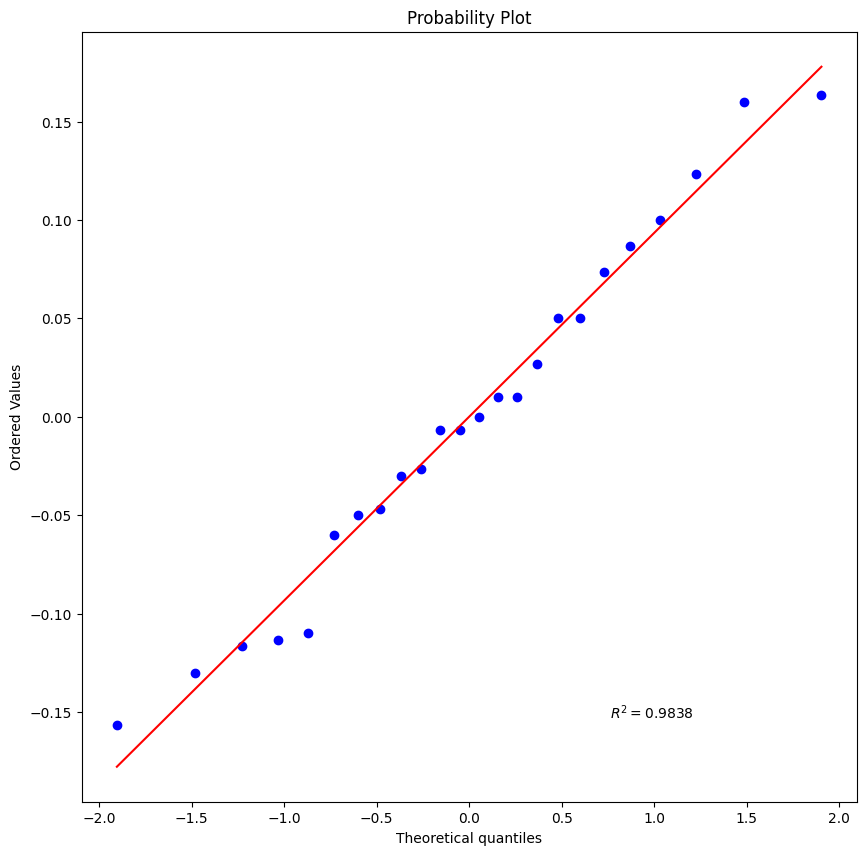

In [143]:
fig2 = plt.figure(figsize= (10, 10))
ax2 = fig.add_subplot(111)
normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax2.set_title("Probability plot of model residual's for Trial 2", fontsize= 20)
ax2.set
plt.show()

In [144]:
stats.levene(df2['Times'][df2['a'] == -1], df2['Times'][df2['a'] == 1])

LeveneResult(statistic=0.9430211953460894, pvalue=0.3420584885602168)

In [145]:
stats.levene(df2['Times'][df2['b'] == -1], df2['Times'][df2['b'] == 1])

LeveneResult(statistic=1.150680962039991, pvalue=0.29503292199037534)

In [146]:
stats.levene(df2['Times'][df2['c'] == -1], df2['Times'][df2['c'] == 1])

LeveneResult(statistic=0.3137588726786958, pvalue=0.5810423201935685)

In [147]:
stats.levene(df2['Times'][df2['ab'] == -1], df2['Times'][df2['ab'] == 1])

LeveneResult(statistic=2.120732881277044, pvalue=0.1594413134320767)

In [148]:
stats.levene(df2['Times'][df2['ac'] == -1], df2['Times'][df2['ac'] == 1])

LeveneResult(statistic=11.199512288311782, pvalue=0.0029204475152323646)

In [149]:
stats.levene(df2['Times'][df2['bc'] == -1], df2['Times'][df2['abc'] == 1])

LeveneResult(statistic=2.1029601869866714, pvalue=0.16112248783939892)

In [150]:
stats.levene(df2['Times'][df2['abc'] == -1], df2['Times'][df2['abc'] == 1])

LeveneResult(statistic=0.8752196351526651, pvalue=0.35967070019275305)

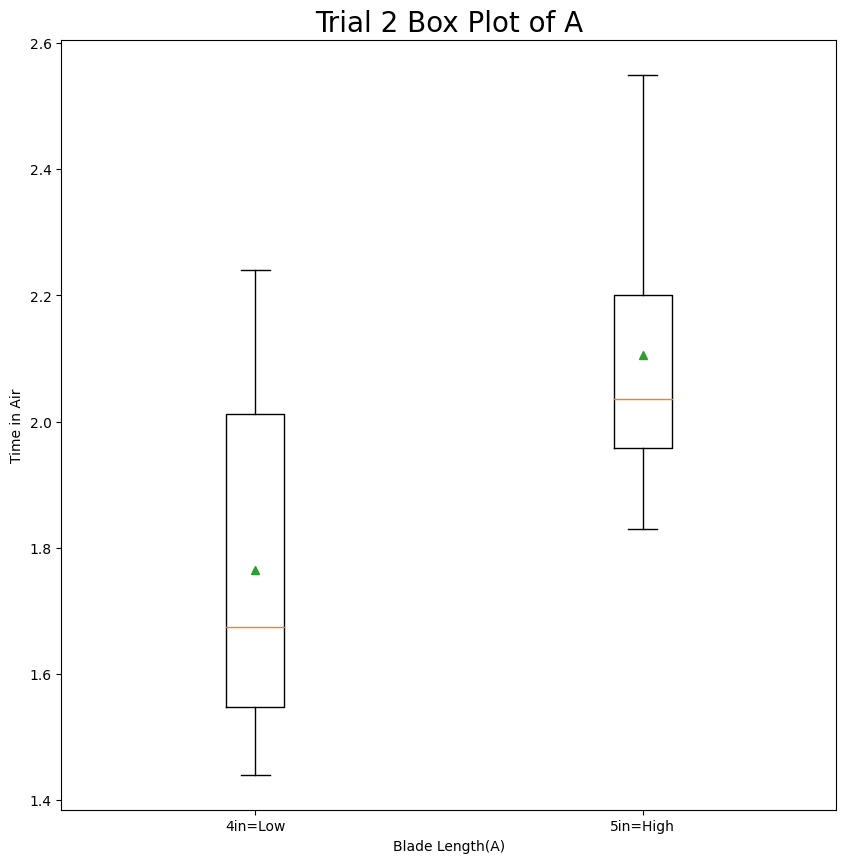

In [151]:
fig2 = plt.figure(figsize= (10, 10))
ax2 = fig2.add_subplot(111)
ax2.set_title("Trial 2 Box Plot of A", fontsize= 20)
ax2.set
dataa2 = [df2['Times'][df2['a'] == -1], df2['Times'][df2['a'] == +1]]
ax2.boxplot(dataa2, labels= ['4in=Low', '5in=High'], showmeans= True)
plt.xlabel("Blade Length(A)")
plt.ylabel("Time in Air")
plt.show()

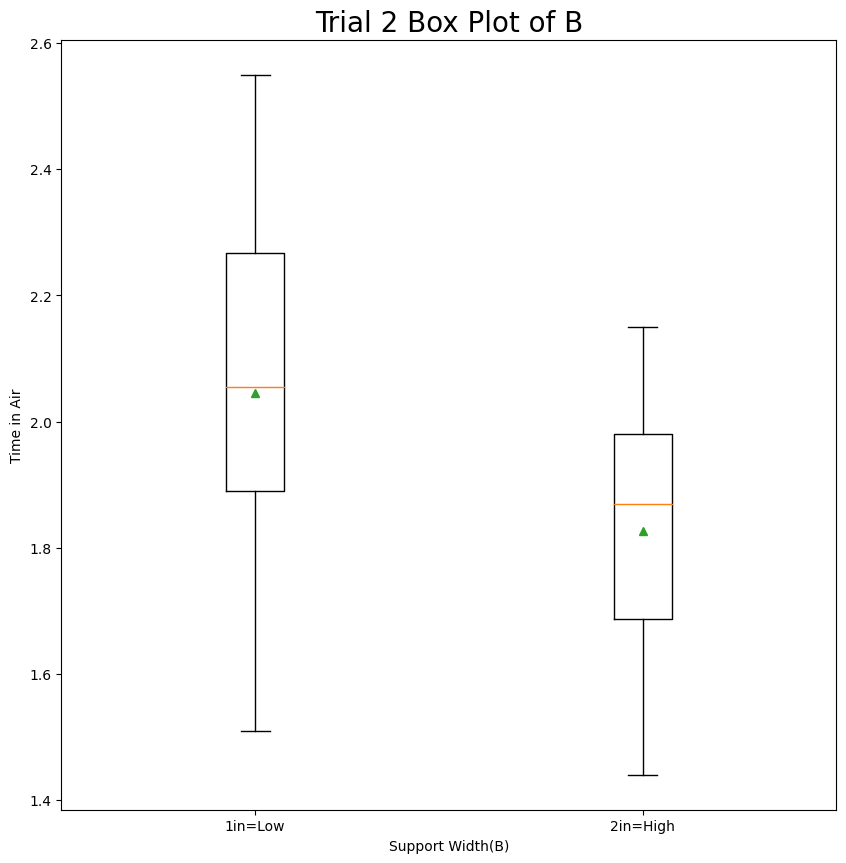

In [152]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Trial 2 Box Plot of B", fontsize= 20)
ax.set
dataa2 = [df2['Times'][df2['b'] == -1], df2['Times'][df2['b'] == +1]]
ax.boxplot(dataa2, labels= ['1in=Low', '2in=High'], showmeans= True)
plt.xlabel("Support Width(B)")
plt.ylabel("Time in Air")
plt.show()

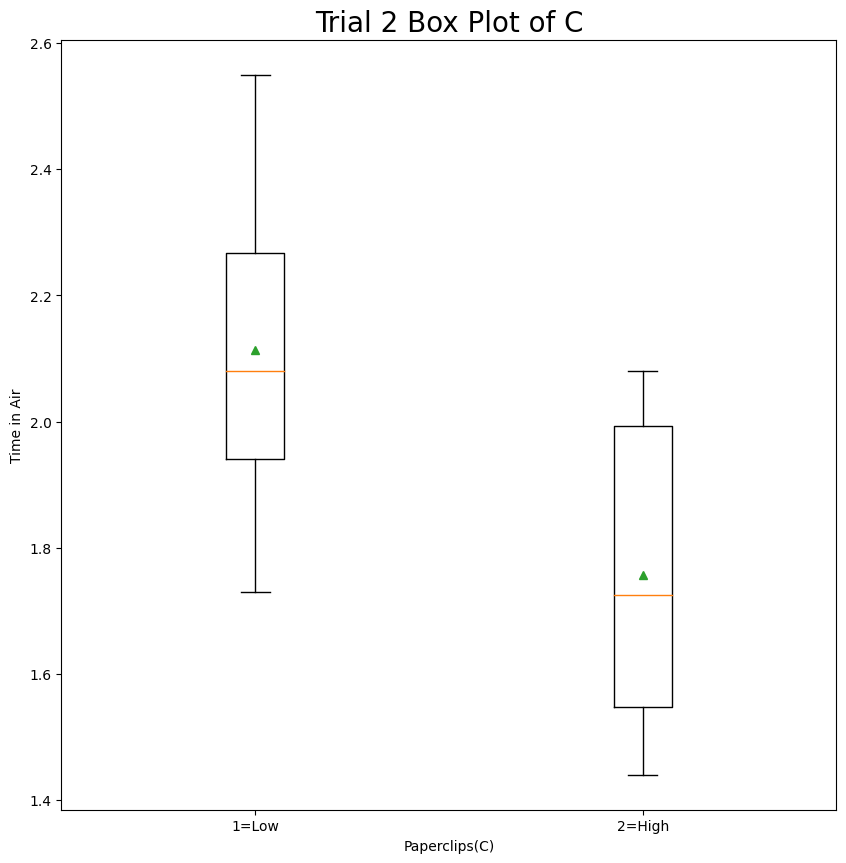

In [153]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Trial 2 Box Plot of C", fontsize= 20)
ax.set
dataa2 = [df2['Times'][df2['c'] == -1], df2['Times'][df2['c'] == +1]]
ax.boxplot(dataa2, labels= ['1=Low', '2=High'], showmeans= True)
plt.xlabel("Paperclips(C)")
plt.ylabel("Time in Air")
plt.show()

In [154]:
formula2 = 'Times ~ a + b + c + ab + ac + bc + abc'
model2 = ols(formula2, data=df2).fit()
anova_table2 = sm.stats.anova_lm(model2)
print(anova_table2)

            df    sum_sq   mean_sq          F        PR(>F)
a          1.0  0.697004  0.697004  59.871510  8.523329e-07
b          1.0  0.288204  0.288204  24.756263  1.374830e-04
c          1.0  0.766838  0.766838  65.870079  4.598117e-07
ab         1.0  0.023437  0.023437   2.013243  1.751182e-01
ac         1.0  0.080504  0.080504   6.915175  1.820817e-02
bc         1.0  0.105337  0.105337   9.048318  8.338407e-03
abc        1.0  0.021004  0.021004   1.804223  1.979463e-01
Residual  16.0  0.186267  0.011642        NaN           NaN


In [155]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/CSV/Trial 3 Table for Paper Helicopter.csv',sep = ',', na_values = ".")
df3

,Name,a,b,c,ab,ac,bc,abc,Times
0,I,-1,-1,-1,1,1,1,-1,2.55
1,a,1,-1,-1,-1,-1,1,1,2.35
2,ab,1,1,-1,1,-1,-1,-1,2.02
3,b,-1,1,-1,-1,1,-1,1,2.15
4,ac,1,-1,1,-1,1,-1,-1,1.94
5,bc,-1,1,1,-1,-1,1,-1,2.14
6,c,-1,-1,1,1,-1,-1,1,2.08
7,abc,1,1,1,1,1,1,1,2.03
8,I,-1,-1,-1,1,1,1,-1,2.49
9,a,1,-1,-1,-1,-1,1,1,2.05


In [156]:
a3 = df3[['a']].to_numpy()
b3 = df3[['b']].to_numpy()
c3 = df3[['c']].to_numpy()
ab3 = df3[['ab']].to_numpy()
ac2 = df3[['ac']].to_numpy()
bc3 = df3[['bc']].to_numpy()
abc3 = df3[['abc']].to_numpy()

In [157]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    24 non-null     object 
 1   a       24 non-null     int64  
 2   b       24 non-null     int64  
 3   c       24 non-null     int64  
 4   ab      24 non-null     int64  
 5   ac      24 non-null     int64  
 6   bc      24 non-null     int64  
 7   abc     24 non-null     int64  
 8   Times   24 non-null     float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.8+ KB


In [158]:
X3 = df3[['a','b','c','ab','ac','bc','abc']]
X3 = sm.add_constant(X3)
X3

,const,a,b,c,ab,ac,bc,abc
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,1,1,-1,1,-1,-1,-1
3,1.0,-1,1,-1,-1,1,-1,1
4,1.0,1,-1,1,-1,1,-1,-1
5,1.0,-1,1,1,-1,-1,1,-1
6,1.0,-1,-1,1,1,-1,-1,1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1


In [159]:
Y3 = df3[['Times']]
Y3

,Times
0,2.55
1,2.35
2,2.02
3,2.15
4,1.94
5,2.14
6,2.08
7,2.03
8,2.49
9,2.05


In [160]:
model = sm.OLS(Y3, X3)
res3=model.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Times   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     7.293
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           0.000515
Time:                        02:34:48   Log-Likelihood:                 22.032
No. Observations:                  24   AIC:                            -28.06
Df Residuals:                      16   BIC:                            -18.64
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0458      0.024     84.693      0.0

In [161]:
residual3 = res3.resid
residual3

0     8.666667e-02
1     2.300000e-01
2     1.166667e-01
3     1.600000e-01
4     4.666667e-02
5     1.133333e-01
6     5.000000e-02
7     9.000000e-02
8     2.666667e-02
9    -7.000000e-02
10   -1.333333e-02
11   -3.000000e-02
12   -3.333333e-03
13    3.333333e-03
14   -4.440892e-16
15   -4.440892e-16
16   -1.133333e-01
17   -1.600000e-01
18   -1.033333e-01
19   -1.300000e-01
20   -4.333333e-02
21   -1.166667e-01
22   -5.000000e-02
23   -9.000000e-02
dtype: float64

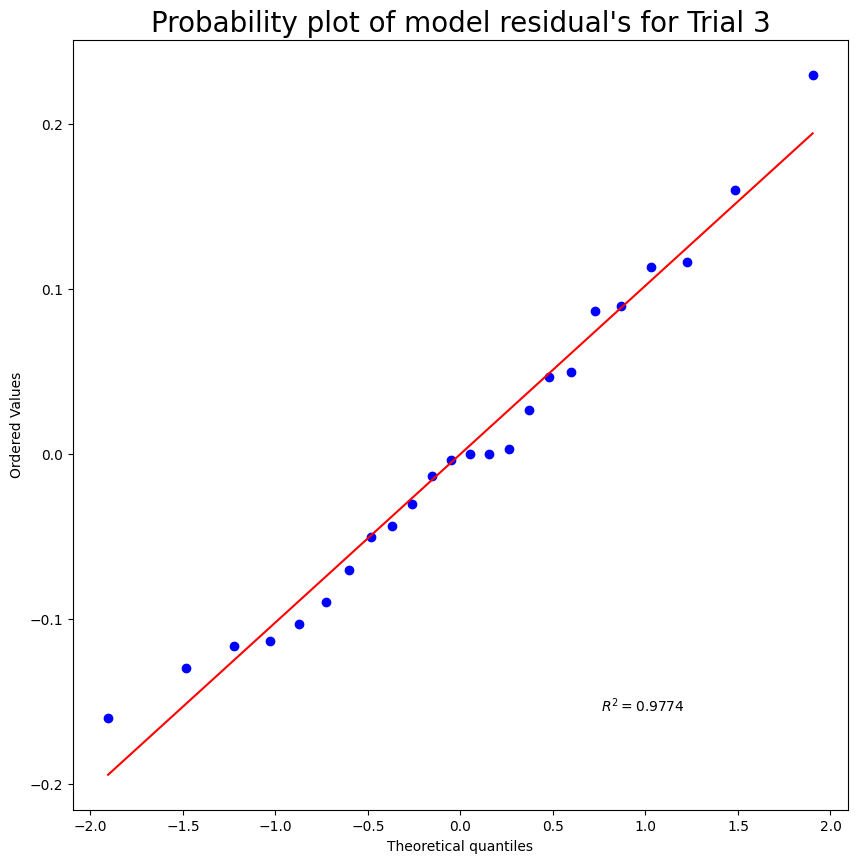

In [162]:
fig3 = plt.figure(figsize= (10, 10))
ax3 = fig3.add_subplot(111)
normality_plot, stat = stats.probplot(res3.resid, plot= plt, rvalue= True)
ax3.set_title("Probability plot of model residual's for Trial 3", fontsize= 20)
ax3.set
plt.show()

In [163]:
stats.levene(df3['Times'][df3['a'] == -1], df3['Times'][df3['a'] == 1])

LeveneResult(statistic=1.6432235911937008, pvalue=0.2132288814043238)

In [164]:
stats.levene(df3['Times'][df3['b'] == -1], df3['Times'][df3['b'] == 1])

LeveneResult(statistic=3.245164805230187, pvalue=0.08535750840612319)

In [165]:
stats.levene(df3['Times'][df3['c'] == -1], df3['Times'][df3['c'] == 1])

LeveneResult(statistic=6.636377512083447, pvalue=0.017232079498259098)

In [166]:
stats.levene(df3['Times'][df3['ab'] == -1], df3['Times'][df3['ab'] == 1])

LeveneResult(statistic=1.142398689017103, pvalue=0.29673392108962415)

In [167]:
stats.levene(df3['Times'][df3['ac'] == -1], df3['Times'][df3['ac'] == 1])

LeveneResult(statistic=1.8029340677870798, pvalue=0.19304913665413231)

In [168]:
stats.levene(df3['Times'][df3['bc'] == -1], df3['Times'][df3['bc'] == 1])

LeveneResult(statistic=3.7594489092996612, pvalue=0.06544311107443604)

In [169]:
stats.levene(df3['Times'][df3['abc'] == -1], df3['Times'][df3['abc'] == 1])

LeveneResult(statistic=2.583897772501925, pvalue=0.1222139668614651)

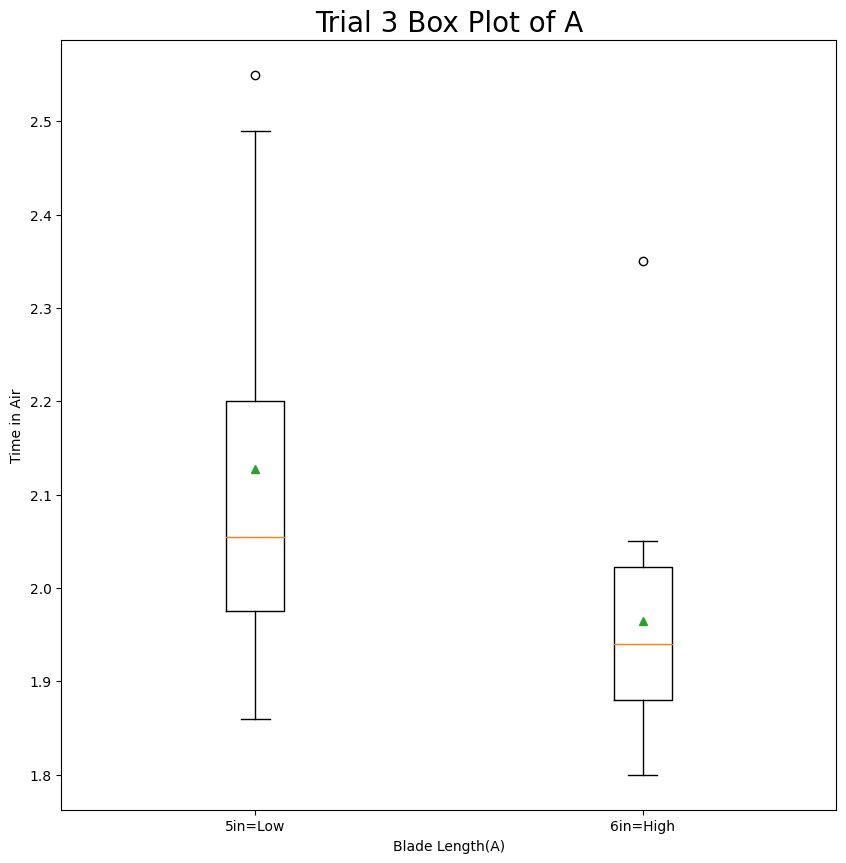

In [170]:
fig3 = plt.figure(figsize= (10, 10))
ax3 = fig3.add_subplot(111)
ax3.set_title("Trial 3 Box Plot of A", fontsize= 20)
ax3.set
dataa3 = [df3['Times'][df3['a'] == -1], df3['Times'][df3['a'] == +1]]
ax3.boxplot(dataa3, labels= ['5in=Low', '6in=High'], showmeans= True)
plt.xlabel("Blade Length(A)")
plt.ylabel("Time in Air")
plt.show()

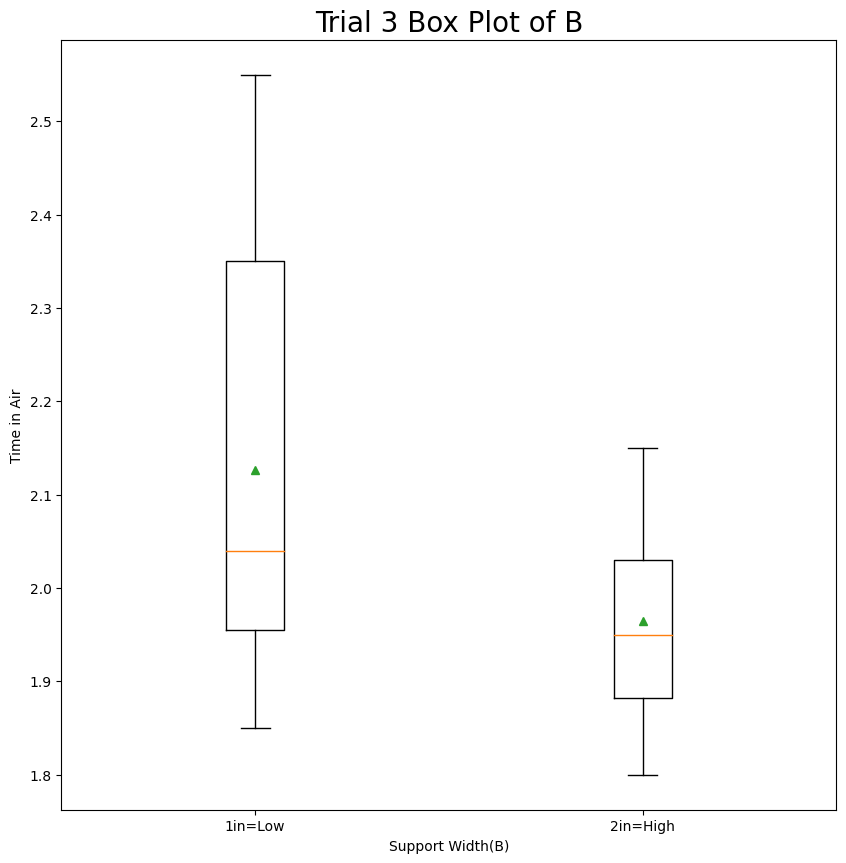

In [171]:
fig3 = plt.figure(figsize= (10, 10))
ax3 = fig3.add_subplot(111)
ax3.set_title("Trial 3 Box Plot of B", fontsize= 20)
ax3.set
dataa3 = [df3['Times'][df3['b'] == -1], df3['Times'][df3['b'] == +1]]
ax3.boxplot(dataa3, labels= ['1in=Low', '2in=High'], showmeans= True)
plt.xlabel("Support Width(B)")
plt.ylabel("Time in Air")
plt.show()

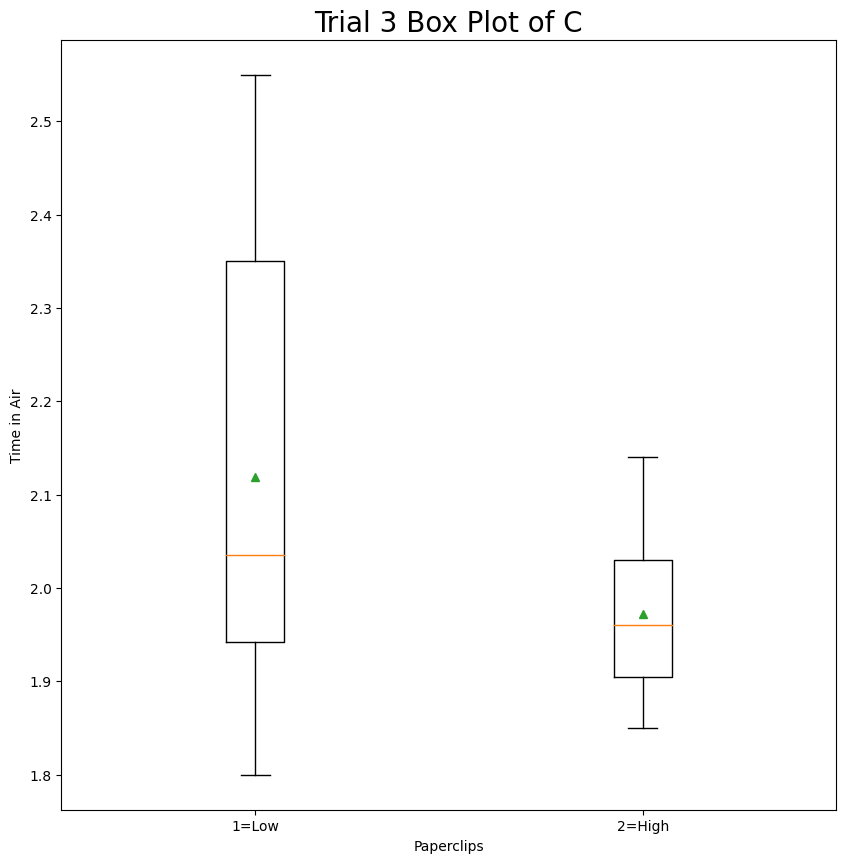

In [172]:
fig3 = plt.figure(figsize= (10, 10))
ax3 = fig3.add_subplot(111)
ax3.set_title("Trial 3 Box Plot of C", fontsize= 20)
ax3.set
dataa3 = [df3['Times'][df3['c'] == -1], df3['Times'][df3['c'] == +1]]
ax3.boxplot(dataa3, labels= ['1=Low', '2=High'], showmeans= True)
plt.xlabel("Paperclips")
plt.ylabel("Time in Air")
plt.show()

In [173]:
formula3 = 'Times ~ a + b + c + ab + ac + bc + abc'
model3 = ols(formula3, data=df3).fit()
anova_table3 = sm.stats.anova_lm(model3)
print(anova_table3)

            df    sum_sq   mean_sq          F    PR(>F)
a          1.0  0.160067  0.160067  11.429932  0.003811
b          1.0  0.156817  0.156817  11.197858  0.004099
c          1.0  0.129067  0.129067   9.216305  0.007868
ab         1.0  0.035267  0.035267   2.518298  0.132095
ac         1.0  0.016017  0.016017   1.143707  0.300740
bc         1.0  0.201667  0.201667  14.400476  0.001590
abc        1.0  0.016017  0.016017   1.143707  0.300740
Residual  16.0  0.224067  0.014004        NaN       NaN
